In [1]:
# import all libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import pyabf

In [2]:
# set style for seaborn
sns.set_style('whitegrid')

In [3]:
# get all file path and names in a list with key and value
file_name = {
    'abf': "Example_Binary.abf",
    'csv': "Example_CSV.csv",
    'xlsx': "Example_Excel.xlsx",
    'img': "Example_Image.jpg"
}

### Reading and manipulating binary file

In [4]:
# read the binary file and show details
abf = pyabf.ABF(file_name['abf'])
abf.setSweep(3) # sweeps start at 0
print(abf,'\n') # print details 
print(abf.sweepY) # # sweep data 
print(abf.sweepC) # sweep command
print(abf.sweepX) # sweep times

ABF file (Example_Binary.abf) with 2 channels, 6 sweeps, and a total length of 0.10 min. 

[-61.9812   -61.73706  -62.042236 ... -61.76758  -61.9812   -61.798096]
[nan nan nan ... nan nan nan]
[0.000e+00 1.000e-04 2.000e-04 ... 9.997e-01 9.998e-01 9.999e-01]


Above are the details of binary file which given channels, sweeps and lenghth of the file.

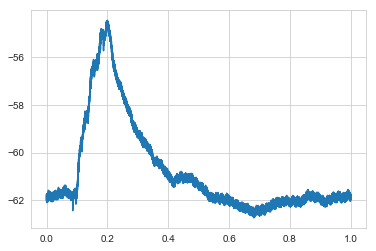

In [5]:
# plotting the binay data
plt.plot(abf.sweepX, abf.sweepY)
plt.show()

Basic plot between sweep times on X-axis and sweep data on Y-axis. Most sweeps have peak at 0.2 seconds.

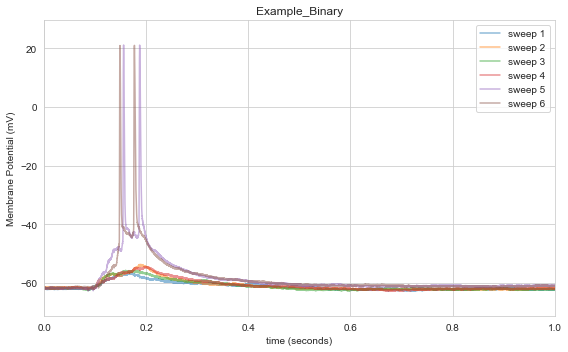

In [6]:
# plotting data for each sweep
plt.figure(figsize=(8, 5))
for sweepNumber in range(abf.sweepCount)[::1]:
    abf.setSweep(sweepNumber)
    plt.plot(abf.sweepX,abf.sweepY,alpha=.5,label=f"sweep {sweepNumber+1}")

# define all attributes of the plot
plt.margins(0, .1)
plt.legend()
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
plt.title(abf.abfID)
plt.tight_layout()
plt.show()

Plot between sweep times on X-axis and sweep data on Y-axis for each sweep shown in different colors.

### Reading and manipulating Excel file

In [7]:
# read excel data
xlsx_data = pd.read_excel(file_name['xlsx'])

# function to show head of data
def show_head(f):
    head = f.head()
    print(f'There are {f.shape[1]} columns and {f.shape[0]} rows in the dataset.')
    return head

# call function
show_head(xlsx_data)

There are 16 columns and 700 rows in the dataset.


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


Read excel file and show its details and top 5 rows.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


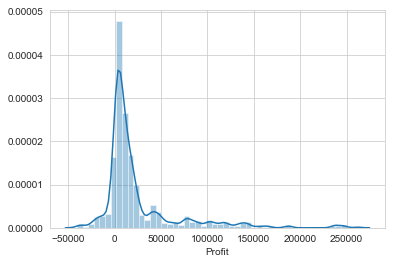

In [8]:
sns.distplot(xlsx_data['Profit'])

Histogram of profit. We can observe that data is not distributed normally, it is skewed to right. With peaks from 0 to 35000$ thus depicting most profits are in that range.

In [9]:
xlsx_data['Profit'].describe()

count       700.000000
mean      24133.860371
std       42760.626563
min      -40617.500000
25%        2805.960000
50%        9242.200000
75%       22662.000000
max      262200.000000
Name: Profit, dtype: float64

Describe profit data to understand its different attributes. Mean profit is around 25k.

Text(0,0.5,'Profit in dollars($)')

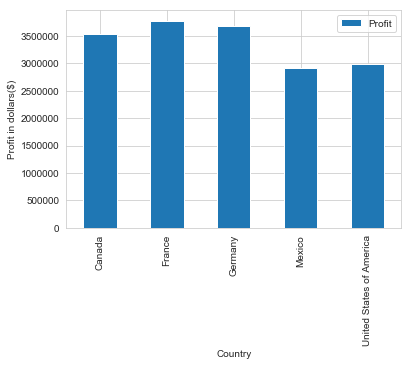

In [10]:
# show list of countries with most profit(by sum)
df = pd.pivot_table(xlsx_data, index=['Country'], values=['Profit'], aggfunc=np.sum).plot(kind= 'bar')
plt.ylabel("Profit in dollars($)")

Plot showing sum of profits for different countries

In [11]:
# show list of countries with most profit in year 2014
year = xlsx_data[xlsx_data['Year'] == 2014]

# show results for year 2014
df = pd.pivot_table(year, index=['Country'], values=['Profit'], aggfunc=np.sum)
df

,Profit
Country,
Canada,2725557.105
France,2969688.610
Germany,2562169.350
Mexico,2314852.850
United States of America,2442969.835


List gives profit aggregated for year 2014 for each country

In [12]:
country_mean = xlsx_data.groupby('Country').mean()
country_mean

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
Country,,,,,,,,,,
Canada,1767.346429,93.928571,118.428571,192372.596429,14603.632964,177768.963464,152560.185714,25208.777750,7.9,2013.75
France,1720.935714,95.528571,118.428571,186297.675000,12339.301571,173958.373429,146951.082143,27007.291286,7.9,2013.75
Germany,1439.242857,95.500000,118.428571,178010.482143,10115.190571,167895.291571,141606.800000,26288.491571,7.9,2013.75
Mexico,1452.321429,95.671429,118.428571,162335.250000,12697.020643,149638.229357,128870.207143,20768.022214,7.9,2013.75
United States of America,1661.625000,101.757143,118.428571,194781.128571,15996.627393,178784.501179,157387.782143,21396.719036,7.9,2013.75


Table gives mean values of all parameters country-wise

Text(0.5,1,'The mean of profit for countries')

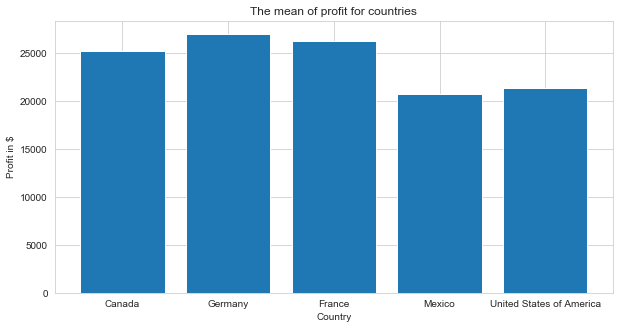

In [13]:
# get unique contries list
countries = xlsx_data['Country'].unique().tolist()

# get mean profit data
profit = country_mean['Profit']

# barplot of contry and its mean profit
plt.figure(figsize=(10,5))
plt.bar(countries, profit, 0.8)
plt.xlabel('Country')
plt.ylabel('Profit in $')
plt.title('The mean of profit for countries')

Mean profit for each country

In [14]:
df = pd.pivot_table(xlsx_data, index = ['Segment', 'Country'], values="Profit")
df

Profit
Segment          Country                               
Channel Partners Canada                    17948.907000
                 France                    13579.068000
                 Germany                   12367.944000
                 Mexico                     8544.504000
                 United States of America  13399.734000
Enterprise       Canada                    -6075.437500
                 France                    -4787.468750
                 Germany                   -5073.687500
                 Mexico                    -6033.937500
                 United States of America  -8756.750000
Government       Canada                    37641.192000
                 France                    45165.253667
                 Germany                   44619.599000
                 Mexico                    33985.989667
                 United States of America  28390.851833
Midmarket        Canada                     6624.448750
                 France                     8227.103750
                 Germany                    4267.737500
                 Mexico                     7527.320000
                 United States of America   6358.543750
Small Business   Canada                    45039.950000
                 France                    36536.575000
                 Germany                   38598.650000
                 Mexico                    33380.300000
                 United States of America  53602.950000

List shows segment wise clssification of countries with their profits

In [15]:
# corrlation heatmap of data
corr = xlsx_data.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def heatmap():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "13pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '13pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover over to magnify")\
    .set_precision(2)\
    .set_table_styles(heatmap())

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
Units Sold,1,-0.03,-0.065,0.33,0.25,0.33,0.33,0.23,-0.1,0.064
Manufacturing Price,-0.03,1,0.071,0.05,0.021,0.052,0.047,0.062,0.005,-0.00093
Sale Price,-0.065,0.071,1,0.81,0.64,0.81,0.8,0.65,-2.2e-17,-1.7e-16
Gross Sales,0.33,0.05,0.81,1,0.78,1,0.99,0.78,-0.035,0.044
Discounts,0.25,0.021,0.64,0.78,1,0.74,0.78,0.38,-0.054,0.022
Sales,0.33,0.052,0.81,1,0.74,1,0.99,0.81,-0.032,0.046
COGS,0.33,0.047,0.8,0.99,0.78,0.99,1,0.73,-0.036,0.047
Profit,0.23,0.062,0.65,0.78,0.38,0.81,0.73,1,-0.0067,0.027
Month Number,-0.1,0.005,-2.2e-17,-0.035,-0.054,-0.032,-0.036,-0.0067,1,-0.43
Year,0.064,-0.00093,-1.7e-16,0.044,0.022,0.046,0.047,0.027,-0.43,1


Correlation heatmap to display correlation between different variables in data. If I want to analyze which parameters affect the increase or decrease in "Profits". 

From the above heatmap we can see that there is strong positive correlation of 0.81 between Profit and Sales and weak correlation between Manufacturing Price and Profit. This Profit varies proportionally with sales and it has less to vary with Manufacturing Price of the product. 
We can verify this by plotting between them like below:

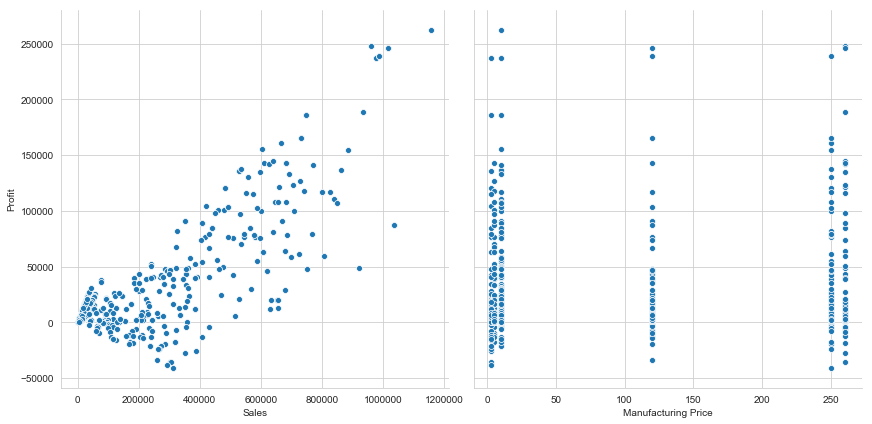

In [16]:
Sales = xlsx_data[' Sales']
MP = xlsx_data['Manufacturing Price']
Profit = xlsx_data['Profit']

df = pd.DataFrame({"Sales": Sales,
                   "Manufacturing Price": MP,
                   "Profit": Profit})

#ax = sns.scatterplot(x=df, y="MPG Highway", data=data)
pp = sns.pairplot(data=df,
                  x_vars=['Sales','Manufacturing Price'],
                  y_vars=['Profit'],height=6, aspect=1)

The positive correlation exists between Sales and Profit as shown in the correlation plot and there is very weak or no correlation exists between Manufacturing Price and Profit.

I have analyzed just two attributes, but we can analyze more parameters by providing them as input in the pairplot above.

### Reading and manipulating CSV file

In [17]:
# read csv file
csv_data = pd.read_csv(file_name['csv'])

# call show_head function
show_head(csv_data)

There are 33 columns and 1244 rows in the dataset.


,ImageNumber,ObjectNumber,Intensity_IntegratedIntensityEdge_DAPI,Intensity_IntegratedIntensityEdge_PI,Intensity_IntegratedIntensity_DAPI,Intensity_IntegratedIntensity_PI,Intensity_LowerQuartileIntensity_DAPI,Intensity_LowerQuartileIntensity_PI,Intensity_MADIntensity_DAPI,Intensity_MADIntensity_PI,...,Intensity_MinIntensityEdge_PI,Intensity_MinIntensity_DAPI,Intensity_MinIntensity_PI,Intensity_StdIntensityEdge_DAPI,Intensity_StdIntensityEdge_PI,Intensity_StdIntensity_DAPI,Intensity_StdIntensity_PI,Intensity_UpperQuartileIntensity_DAPI,Intensity_UpperQuartileIntensity_PI,Number_Object_Number
0,1,1,5.066987,4.504585,63.661448,26.980835,0.060006,0.035172,0.019913,0.001007,...,0.031388,0.031815,0.031388,0.005757,0.001566,0.029094,0.001507,0.107881,0.037224,1
1,1,2,4.461616,3.758312,52.943389,20.978958,0.055276,0.033928,0.033433,0.001694,...,0.028016,0.029816,0.027481,0.005620,0.002464,0.036908,0.002593,0.121820,0.037316,2
2,1,3,4.838346,2.810544,31.127337,12.375784,0.064607,0.030098,0.014519,0.000992,...,0.027512,0.038941,0.027512,0.007579,0.001566,0.019099,0.001467,0.092367,0.032090,3
3,1,4,3.235828,3.306371,38.797894,18.318380,0.040070,0.032624,0.028779,0.000977,...,0.028748,0.026749,0.028748,0.003096,0.001483,0.030482,0.001442,0.096674,0.034585,4
4,1,5,3.967391,3.223301,37.443107,15.369772,0.056352,0.032898,0.027031,0.001404,...,0.028244,0.031708,0.028153,0.005773,0.002650,0.030331,0.002118,0.110895,0.035672,5


CSV file has 33 columns and 1244 rows with the top 5 rows display by using show_head function

In [18]:
# adding all integrated intensities in one new column in excel
csv_data['Total_IntegratedIntensity'] = csv_data['Intensity_IntegratedIntensityEdge_DAPI'] + csv_data['Intensity_IntegratedIntensityEdge_PI'] + csv_data['Intensity_IntegratedIntensity_DAPI'] + csv_data['Intensity_IntegratedIntensity_PI']

# call show_head function
show_head(csv_data)

There are 34 columns and 1244 rows in the dataset.


,ImageNumber,ObjectNumber,Intensity_IntegratedIntensityEdge_DAPI,Intensity_IntegratedIntensityEdge_PI,Intensity_IntegratedIntensity_DAPI,Intensity_IntegratedIntensity_PI,Intensity_LowerQuartileIntensity_DAPI,Intensity_LowerQuartileIntensity_PI,Intensity_MADIntensity_DAPI,Intensity_MADIntensity_PI,...,Intensity_MinIntensity_DAPI,Intensity_MinIntensity_PI,Intensity_StdIntensityEdge_DAPI,Intensity_StdIntensityEdge_PI,Intensity_StdIntensity_DAPI,Intensity_StdIntensity_PI,Intensity_UpperQuartileIntensity_DAPI,Intensity_UpperQuartileIntensity_PI,Number_Object_Number,Total_IntegratedIntensity
0,1,1,5.066987,4.504585,63.661448,26.980835,0.060006,0.035172,0.019913,0.001007,...,0.031815,0.031388,0.005757,0.001566,0.029094,0.001507,0.107881,0.037224,1,100.213855
1,1,2,4.461616,3.758312,52.943389,20.978958,0.055276,0.033928,0.033433,0.001694,...,0.029816,0.027481,0.005620,0.002464,0.036908,0.002593,0.121820,0.037316,2,82.142275
2,1,3,4.838346,2.810544,31.127337,12.375784,0.064607,0.030098,0.014519,0.000992,...,0.038941,0.027512,0.007579,0.001566,0.019099,0.001467,0.092367,0.032090,3,51.152011
3,1,4,3.235828,3.306371,38.797894,18.318380,0.040070,0.032624,0.028779,0.000977,...,0.026749,0.028748,0.003096,0.001483,0.030482,0.001442,0.096674,0.034585,4,63.658473
4,1,5,3.967391,3.223301,37.443107,15.369772,0.056352,0.032898,0.027031,0.001404,...,0.031708,0.028153,0.005773,0.002650,0.030331,0.002118,0.110895,0.035672,5,60.003571


Here all the 4 integrated intensities are summed to provide Total and add 'Total_IntegratedIntensity' as last column in the dataset. Move to right to see the added column in the dataset.

### Reading and manipulating image file

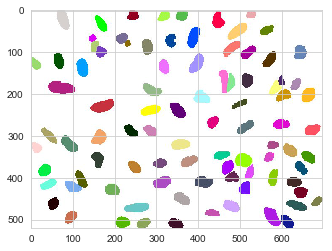

In [19]:
# read image file
img_data = mpimg.imread(file_name['img'])

# show image
plt.imshow(img_data)

Original JPEG Image with dimension = 696 × 520 and size of 53kb

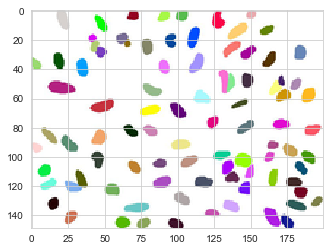

In [20]:
from PIL import Image

basewidth = 200
img = Image.open('Example_Image.jpg')
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), Image.ANTIALIAS)

## save image with name resized_image.jpg
#img.save('resized_image.jpg')
        
plt.imshow(img) # show image at output
img.show() # show image in preview

PIL library function and methods are used to resize the image for given size. Resized image with dimensions = 200 × 149and size of 12 kb.

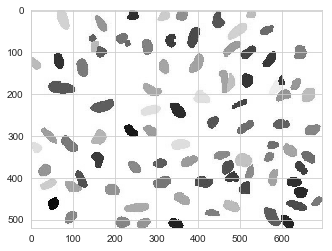

In [21]:
# code to covert imae to grayscae using PIL
img = Image.open('Example_Image.jpg').convert('LA')

## save image with name greyscale.jpg
#img.save('greyscale.png')

plt.imshow(img) # show image at output
img.show() # show image in preview

PIL library function and methods are used to covert the image to grayscale. Other options also available such as setting cmap = 'gray' when using pyplot.

Below code does not use direct function/methods from PIL to grayscale the image. Different functions required to do these things ae created separately and gray_img function is defined which calls different functions to change the color of an image into gray and show it

In [22]:
# Imported PIL Library from PIL import Image

# Create a new image with the given size
def create_image(i, j):
  image = Image.new("RGB", (i, j), "white")
  return image

# Get the pixel from the given image
def get_pixel(image, i, j):
    # Inside image bounds?
    width, height = image.size
    if i > width or j > height:
      return None

    # Get Pixel
    pixel = image.getpixel((i, j))
    return pixel

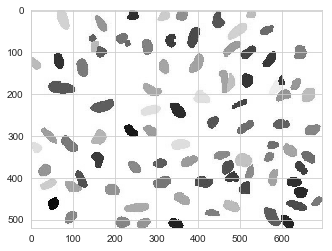

In [23]:
# create a Grayscale version of the image
def gray_img(image):
  # Get size
  width, height = image.size

  # generate new Image and a Pixel Map
  new = create_image(width, height)
  pixels = new.load()

  # convert to grayscale
  for i in range(width):
    for j in range(height):
      # Get Pixel
      pixel = get_pixel(image, i, j)

      # Get R, G, B values (This are int from 0 to 255)
      red =   pixel[0]
      green = pixel[1]
      blue =  pixel[2]

      # Transform to grayscale
      gray = (red * 0.299) + (green * 0.587) + (blue * 0.114)

      # Set Pixel in new image
      pixels[i, j] = (int(gray), int(gray), int(gray))

    # Return new image
    return plt.imshow(img)

# call function gray_img
image = Image.open('Example_Image.jpg')
gray_img(image)

The Example.Image file is converted to Gray without using inbuilt functions directly.